In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

Conjunto de treino
 Area       Preco
  132 3679.817707
  115 2910.912314
  135 3819.419205
   51 1630.216835
   34 1143.887372
   39 1534.004166
  218 5284.499573
  128 3245.159775
  125 3543.138612
  246 5984.606122
   58 2729.720202
  149 3719.918650
  173 4250.111212
  164 4418.468094
  138 3482.706969
  211 4966.502789
   84 2774.860030
  244 5488.163109
  282 6792.336860
  172 4384.139241
  121 3375.712483
  253 5408.779475
  163 4177.853889
  199 4618.356779
  216 4718.388420
  126 3680.392155
  192 4320.105758
  281 6269.003703
  142 3580.262988
  287 6785.672746
  122 3025.410555
   89 2498.494117
   65 2258.101935
  275 5924.214262
  259 6554.724531
  125 3092.262471
  286 6094.354099
   38 1578.523695
  190 4230.353439
  213 4844.896659
  189 4201.063971
  208 4966.522763
  221 5063.258236
  156 3836.053825
  200 4877.812539
  249 5807.348699
   81 2193.109084
  286 7011.181283
  142 3222.648680
   45 1818.149371
  246 5778.553683
   91 2858.785580
   78 2078.627738
  227 503

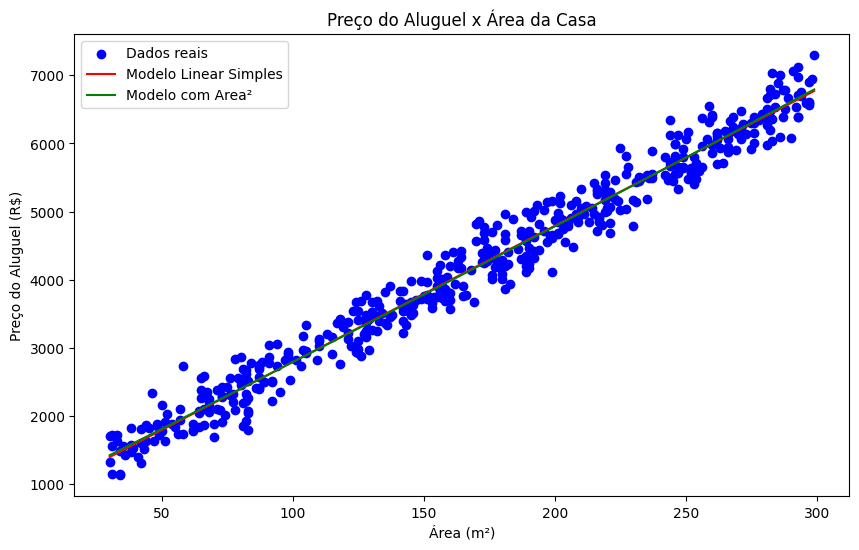

In [18]:
def imprimirDFFormatado(df, titulo):
    print(f'Conjunto de {titulo}')
    print(df.to_string(index=False))
    print(df.shape)
    print()

# Função para dividir os dados em conjuntos de treino e teste
def train_test_split(df, test_size, random_state):
    df = df.sample(frac=1, random_state=random_state)
    n = len(df)
    n_teste = int(test_size * n)
    teste = df.iloc[:n_teste]
    treino = df.iloc[n_teste:]
    return treino, teste

# Carregando os dados

df = pd.read_csv('dataSets/aluguel_uma_variavel_com_ruido.csv')

# Dividindo os dados
treino, teste = train_test_split(df, test_size=0.3, random_state=42)
imprimirDFFormatado(treino, 'treino')
imprimirDFFormatado(teste, 'teste')

# Preparando o plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Area'], df['Preco'], color='blue', label='Dados reais')
temperaturas = np.linspace(df['Area'].min(), df['Area'].max(), 100)

# Loop para testar ambos os modelos
for incluir_quadrado in [False, True]:
    X_treino = treino[['Area']].copy()
    if incluir_quadrado:
        X_treino['Area²'] = X_treino['Area'] ** 2
    y_treino = treino['Preco']
    modelo = LinearRegression()
    modelo.fit(X_treino, y_treino)
    if incluir_quadrado:
        print(f"Modelo com Area²: y = {modelo.coef_[0]:.2f}x + {modelo.coef_[1]:.2f}x² + {modelo.intercept_:.2f}")
    else:
        print(f"Modelo Linear Simples: y = {modelo.coef_[0]:.2f}x + {modelo.intercept_:.2f}")

    r2_treino = r2_score(y_treino, modelo.predict(X_treino))
    print(f'R² treino: {r2_treino:.2f} (incluir quadrado da Area: {incluir_quadrado})')
    
    # Preparando os dados para plotagem
    if incluir_quadrado:
        temperaturas_df = pd.DataFrame({'Area': temperaturas, 'Area²': temperaturas**2})
        plt.plot(temperaturas, modelo.predict(temperaturas_df), label='Modelo com Area²', color='green')
    else:
        temperaturas_df = pd.DataFrame({'Area': temperaturas})
        plt.plot(temperaturas, modelo.predict(temperaturas_df), label='Modelo Linear Simples', color='red')

plt.xlabel('Área (m²)')
plt.ylabel('Preço do Aluguel (R$)')
plt.title('Preço do Aluguel x Área da Casa')
plt.legend()
plt.show()
